In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_path = 'C:/Eugenio/Maestria/DMEyF/'

### Test (Junio)

In [ ]:
Agregar los resultados de test de v12 en el excel test results del escritorio y despues cargarlo aca, hacer lo mismo con el modelo v016

### Public score

In [5]:
results_v02 = pd.read_excel(base_path + 'exp/competencia_2/v002/scores_v002.xlsx')
results_v03 = pd.read_excel(base_path + 'exp/competencia_2/v003/scores_v003.xlsx')
results_v05 = pd.read_excel(base_path + 'exp/competencia_2/v005/scores_v005.xlsx')
results_v08= pd.read_excel(base_path + 'exp/competencia_2/v008/scores_v008.xlsx')
results_v12= pd.read_excel(base_path + 'exp/competencia_2/v012/scores_v012.xlsx')

In [6]:
results_v02['modelo'] = 'v02'
results_v03['modelo'] = 'v03'
results_v05['modelo'] = 'v05'
results_v08['modelo'] = 'v08'
results_v12['modelo'] = 'v012'

In [12]:
results = pd.concat([results_v02, results_v03, results_v05, results_v08, results_v12], axis=0, ignore_index=True)

In [15]:
results['modelo_seed'] = results['modelo'] + ' - ' + results['seed'].astype('str')

In [28]:
summary_stats = results.groupby('modelo_seed')['Public score'].agg(
    min_score='min',
    max_score='max',
    mean_score='mean',
    median_score='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    std_dev='std',
).reset_index()

# Display the table
summary_stats.sort_values(by='mean_score', ascending=False)

,modelo_seed,min_score,max_score,mean_score,median_score,q1,q3,std_dev
20,v08 - 999961,117.251,125.044,121.35995,121.4040,120.78625,122.34375,1.741338
0,v012 - semillero,116.878,122.268,119.50912,119.3860,118.53425,120.35450,1.360578
19,v08 - 401537,116.971,122.944,119.31365,118.9895,118.67425,119.80600,1.433180
18,v08 - 400391,116.318,120.238,118.26940,118.2075,117.41400,119.00075,1.099102
17,v08 - 122219,116.108,119.048,117.95915,118.1840,117.57175,118.55175,0.825784
16,v08 - 109279,115.781,119.141,117.25925,117.2395,116.33500,118.14350,1.085866
12,v05 - 122219,113.448,120.144,116.98615,116.8545,115.29700,118.84950,2.056850
15,v05 - 999961,113.564,118.908,116.58020,117.0760,115.38425,117.68275,1.646467
7,v03 - 122219,111.884,119.818,116.14155,116.3180,114.43350,117.86925,2.330212
13,v05 - 400391,113.331,116.201,115.05535,115.1045,114.53875,115.62950,0.725017


C:\Users\eaneg\AppData\Local\Temp\ipykernel_7664\3116067046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results, x='modelo_seed', y='Public score', palette='Set3')


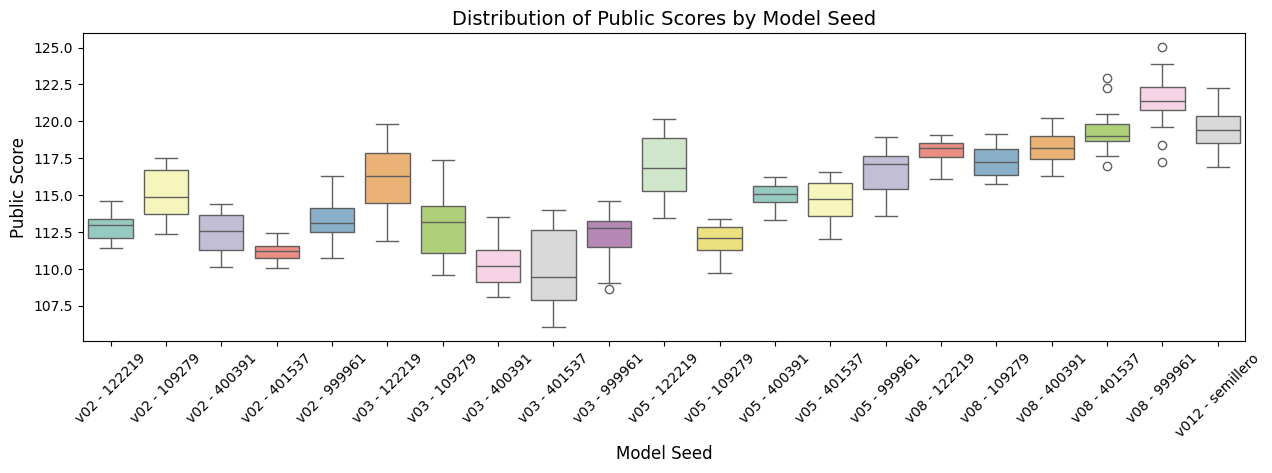

In [29]:
# Create the boxplot
plt.figure(figsize=(15, 4))
sns.boxplot(data=results, x='modelo_seed', y='Public score', palette='Set3')

# Add labels and title
plt.title('Distribution of Public Scores by Model Seed', fontsize=14)
plt.xlabel('Model Seed', fontsize=12)
plt.ylabel('Public Score', fontsize=12)

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [30]:
summary_stats = results.groupby('modelo')['Public score'].agg(
    min_score='min',
    max_score='max',
    mean_score='mean',
    median_score='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    std_dev='std',
).reset_index()

# Display the table
summary_stats.sort_values(by='mean_score', ascending=False)

,modelo,min_score,max_score,mean_score,median_score,q1,q3,std_dev
0,v012,116.878,122.268,119.50912,119.3860,118.53425,120.35450,1.360578
4,v08,115.781,125.044,118.83228,118.5225,117.59525,119.66575,1.902789
3,v05,109.691,120.144,115.03948,115.0225,113.43050,116.13125,2.291286
1,v02,110.064,117.484,112.95158,112.8295,111.41775,113.94950,1.774825
2,v03,106.051,119.818,112.35212,112.5145,110.10475,114.11850,3.032486


C:\Users\eaneg\AppData\Local\Temp\ipykernel_7664\813057553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results, x='modelo', y='Public score', palette='Set3')


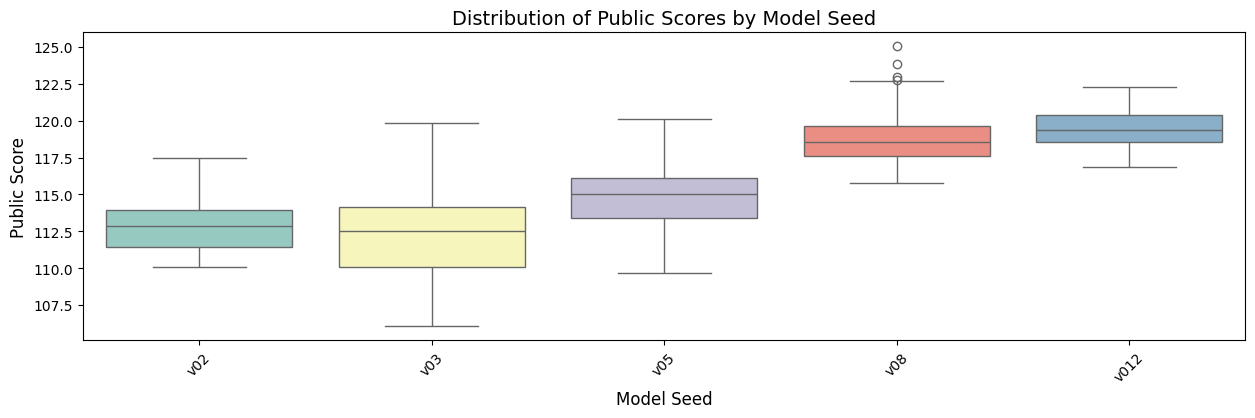

In [20]:
# Create the boxplot
plt.figure(figsize=(15, 4))
sns.boxplot(data=results, x='modelo', y='Public score', palette='Set3')

# Add labels and title
plt.title('Distribution of Public Scores by Model Seed', fontsize=14)
plt.xlabel('Model Seed', fontsize=12)
plt.ylabel('Public Score', fontsize=12)

plt.xticks(rotation=45)

# Show the plot
plt.show()

### Puntos de corte optimos

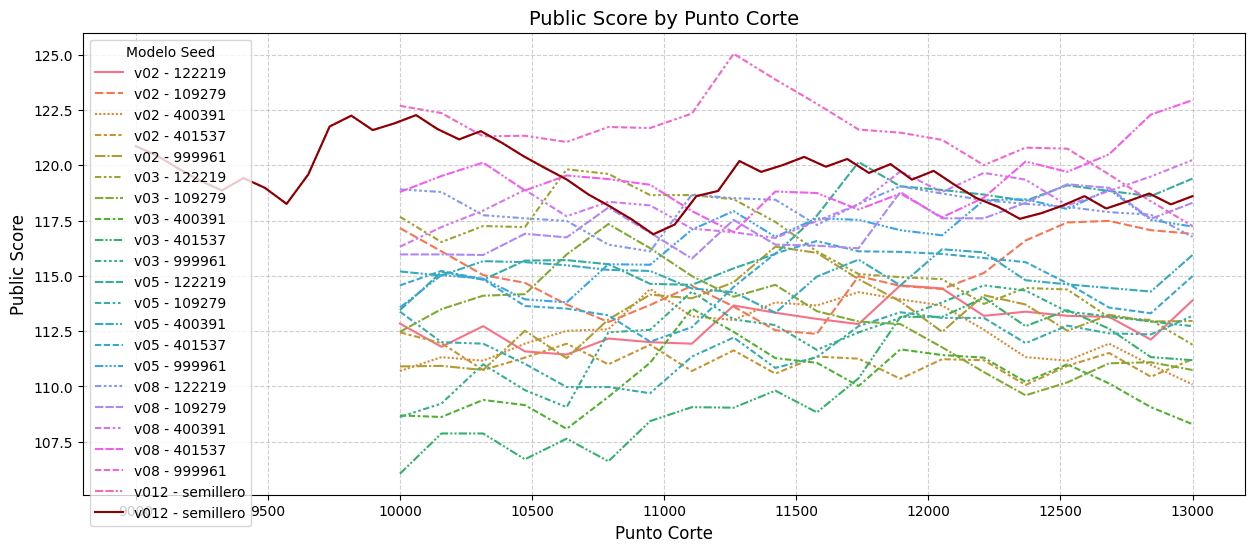

In [35]:
# Plotting the line chart
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=results, 
    x='corte', 
    y='Public score', 
    hue='modelo_seed', 
    markers=False,  # No markers for clarity
    style='modelo_seed'  # Differentiates lines by style
)

# Highlight the line for 'v012 - semillero' with dark red and thicker width
highlighted_line = results[results['modelo_seed'] == 'v012 - semillero']
sns.lineplot(
    data=highlighted_line,
    x='corte',
    y='Public score',
    color='darkred',  # Dark red color
    linewidth=1.5,  # Thicker line
    label='v012 - semillero'  # Custom label in legend
)


# Add labels and title
plt.title('Public Score by Punto Corte', fontsize=14)
plt.xlabel('Punto Corte', fontsize=12)
plt.ylabel('Public Score', fontsize=12)
plt.legend(title='Modelo Seed', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [ ]:
Por ahora sin evaluar aun los resultados de test en junio creo que el corte para el semillero deberia ser tambien alrededor de 11600, parece raro que sea 10000 cuando casi todos los otros modelos dan arriba de eso, salvo que en test tambien nos de cerca de 10000 y ahi confiaremos en test.

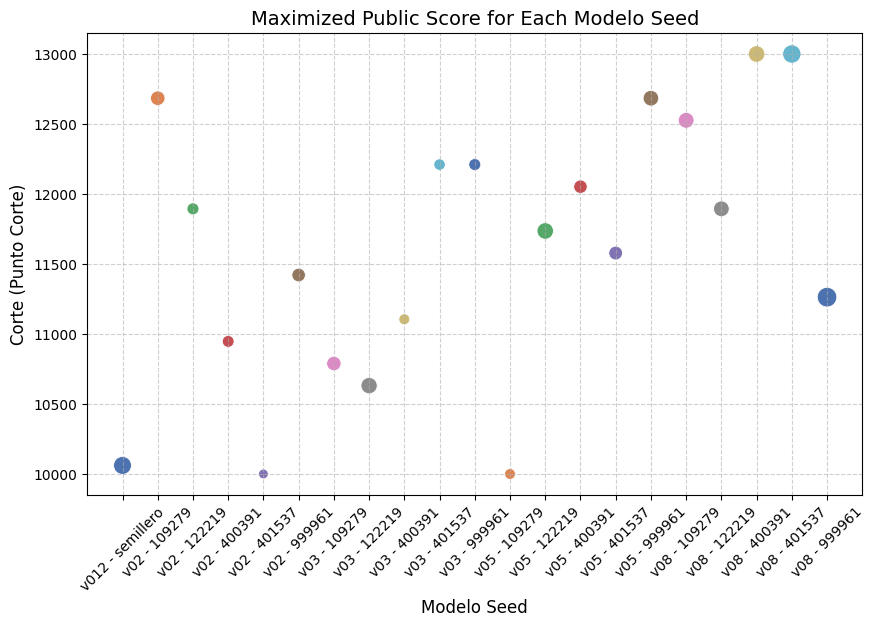

In [36]:
# Find the corte that maximizes public_score for each modelo_seed
max_score_idx = results.groupby('modelo_seed')['Public score'].idxmax()  # Get the index of max public_score
max_score_df = results.loc[max_score_idx, ['modelo_seed', 'corte', 'Public score']]  # Extract the corresponding rows

# Plotting the chart
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=max_score_df,
    x='modelo_seed',
    y='corte',
    size='Public score',  # Optionally size by public_score to show relative scores
    sizes=(50, 200),  # Adjust size scale
    hue='modelo_seed',  # Color points by modelo_seed
    palette='deep',  # Color palette
    legend=False
)

# Add labels and title
plt.title('Maximized Public Score for Each Modelo Seed', fontsize=14)
plt.xlabel('Modelo Seed', fontsize=12)
plt.ylabel('Corte (Punto Corte)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()